<a href="https://colab.research.google.com/github/syedgalib4/student-performance-prediction/blob/main/Week2_Student_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment
### **Install and import necessary libraries:**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Dataset manually:


In [2]:
data = {
    'Hours_Studied': [5, 2, 4, 1, 6, 3, 5, 2, 7, 8],
    'Attendance': [85, 60, 75, 50, 90, 65, 80, 55, 95, 98],
    'Pass_Fail': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)
print(df)

   Hours_Studied  Attendance  Pass_Fail
0              5          85          1
1              2          60          0
2              4          75          1
3              1          50          0
4              6          90          1
5              3          65          0
6              5          80          1
7              2          55          0
8              7          95          1
9              8          98          1


# Visualize the Data

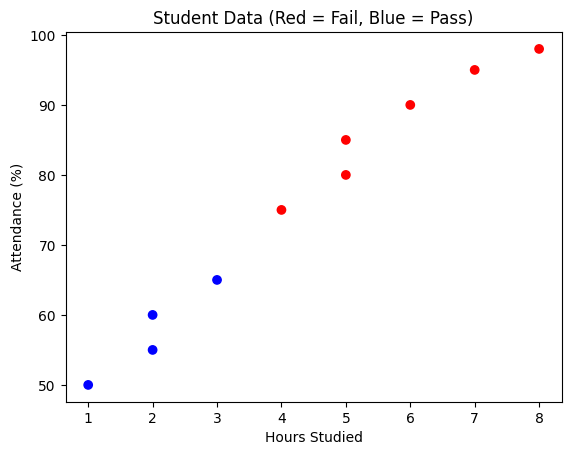

In [3]:
plt.scatter(df['Hours_Studied'], df['Attendance'], c=df['Pass_Fail'], cmap='bwr')
plt.xlabel("Hours Studied")
plt.ylabel("Attendance (%)")
plt.title("Student Data (Red = Fail, Blue = Pass)")
plt.show()

# Split the Data

In [4]:
X = df[['Hours_Studied', 'Attendance']]
y = df['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate Model

In [6]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


# Predict New Values

In [9]:
new_data = pd.DataFrame([
    [3, 70],
    [6, 90],
    [2, 55]
], columns=['Hours_Studied', 'Attendance'])

predictions = model.predict(new_data)
for i, pred in enumerate(predictions):
    print(f"Student {i+1}: {'Pass' if pred == 1 else 'Fail'}")

Student 1: Pass
Student 2: Pass
Student 3: Fail
